In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd /content/drive/My Drive/University/SEM7/CS4642_Data_Mining_and_Information_Retrieval/project_DM_Assignment

/content/drive/My Drive/University/SEM7/CS4642_Data_Mining_and_Information_Retrieval/project_DM_Assignment


# Install and Import Packages

In [22]:
!pip install catboost

In [23]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [0]:
from pathlib import Path
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 

from catboost import CatBoostClassifier
import category_encoders as ce

pd.set_option("display.max_columns", 100)

# Load Data

In [0]:
#changed
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)
test_features_df = pd.read_csv("test_set_features.csv", 
                               index_col="respondent_id")

In [0]:
features_df = features_df.fillna(features_df.mode().iloc[0])
test_features_df = test_features_df.fillna(features_df.mode().iloc[0])
y1 = labels_df["h1n1_vaccine"]
y2 = labels_df["seasonal_vaccine"]

In [0]:
frames = [features_df, test_features_df]
features_df = pd.concat(frames)

In [0]:
features_df['age_group'] = pd.factorize(features_df.age_group)[0]
features_df['age_group'] = features_df['age_group'].astype("category")
features_df['education'] = pd.factorize(features_df.education)[0]
features_df['education'] = features_df['education'].astype("category")
features_df['sex'] = pd.factorize(features_df.sex)[0]
features_df['sex'] = features_df['sex'].astype("category")
features_df['race'] = pd.factorize(features_df.race)[0]
features_df['race'] = features_df['race'].astype("category")
features_df['income_poverty'] = pd.factorize(features_df.income_poverty)[0]
features_df['income_poverty'] = features_df['income_poverty'].astype("category")
features_df['marital_status'] = pd.factorize(features_df.marital_status)[0]
features_df['marital_status'] = features_df['marital_status'].astype("category")
features_df['rent_or_own'] = pd.factorize(features_df.rent_or_own)[0]
features_df['rent_or_own'] = features_df['rent_or_own'].astype("category")
features_df['employment_status'] = pd.factorize(features_df.employment_status)[0]
features_df['employment_status'] = features_df['employment_status'].astype("category")
features_df['hhs_geo_region'] = pd.factorize(features_df.hhs_geo_region)[0]
features_df['hhs_geo_region'] = features_df['hhs_geo_region'].astype("category")
features_df['census_msa'] = pd.factorize(features_df.census_msa)[0]
features_df['census_msa'] = features_df['census_msa'].astype("category")
features_df['employment_industry'] = pd.factorize(features_df.employment_industry)[0]
features_df['employment_industry'] = features_df['employment_industry'].astype("category")
features_df['employment_occupation'] = pd.factorize(features_df.employment_occupation)[0]
features_df['employment_occupation'] = features_df['employment_occupation'].astype("category")

In [29]:
features_df.shape

(53415, 35)

In [30]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0,1,0,0,1,1,1,1,0.0,0.0,1,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2,2,0,1,1,0,0,1,2,1,2.0,0.0,2,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,3,1,0,0,0,0,1,0,3,2,0.0,0.0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,4,3,0,0,1,1,0,1,2,1,1.0,0.0,3,2


In [0]:
train_features_df , test_features_df = features_df[0:26707], features_df[26707:]

In [32]:
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [0]:
train_features_label_df = train_features_df.join(labels_df)
print(train_features_label_df)
train_features_label_df.head()

In [0]:
test.dtypes != "object"

In [0]:
categorical_var = np.where(features_df.dtypes != np.float)[0]

In [38]:
print(categorical_var)

[21 22 23 24 25 26 27 28 29 30 33 34]


In [0]:
estimators = MultiOutputClassifier(
    #estimator=LogisticRegression(penalty="l2", C=1)
    #estimator=RandomForestClassifier(random_state=1)
    #estimator=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    #estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
    #estimator = svm.SVC()
    estimator = CatBoostClassifier(iterations=20000, task_type="GPU",devices='0:1')
    )

In [0]:
full_pipeline = Pipeline([
    ("estimators", estimators),
])

In [0]:
estimator1 = CatBoostClassifier(iterations=20000, task_type="GPU",devices='0:1',cat_features=categorical_var)
estimator2 = CatBoostClassifier(iterations=20000, task_type="GPU",devices='0:1',cat_features=categorical_var)

In [0]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_features_df,
    labels_df,
    test_size=0.01,
    shuffle=True,
    stratify=labels_df,
    # random_state=RANDOM_SEED
)

In [45]:
y_train["h1n1_vaccine"]

respondent_id
24685    0
16790    1
17143    0
14468    0
17401    0
        ..
1572     0
11904    0
9073     0
10886    0
12202    1
Name: h1n1_vaccine, Length: 26439, dtype: int64

In [0]:
estimator1.fit(X_train, y_train["h1n1_vaccine"])
# Predict on evaluation set
# This competition wants probabilities, not labels
preds1 = estimator1.predict_proba(X_eval)
preds1

Learning rate set to 0.001922
0:	learn: 0.6917388	total: 72.5ms	remaining: 24m 9s
1:	learn: 0.6903369	total: 142ms	remaining: 23m 42s
2:	learn: 0.6889489	total: 214ms	remaining: 23m 47s
3:	learn: 0.6875411	total: 294ms	remaining: 24m 31s
4:	learn: 0.6862033	total: 365ms	remaining: 24m 20s
5:	learn: 0.6848434	total: 431ms	remaining: 23m 55s
6:	learn: 0.6834983	total: 503ms	remaining: 23m 56s
7:	learn: 0.6822357	total: 571ms	remaining: 23m 47s
8:	learn: 0.6809020	total: 640ms	remaining: 23m 41s
9:	learn: 0.6795696	total: 714ms	remaining: 23m 46s
10:	learn: 0.6782072	total: 780ms	remaining: 23m 36s
11:	learn: 0.6768378	total: 860ms	remaining: 23m 52s
12:	learn: 0.6755400	total: 931ms	remaining: 23m 51s
13:	learn: 0.6742179	total: 998ms	remaining: 23m 44s
14:	learn: 0.6729139	total: 1.06s	remaining: 23m 38s
15:	learn: 0.6715931	total: 1.13s	remaining: 23m 37s
16:	learn: 0.6702839	total: 1.2s	remaining: 23m 31s
17:	learn: 0.6690007	total: 1.28s	remaining: 23m 39s
18:	learn: 0.6677157	total:

In [0]:
estimator2.fit(X_train, y_train["seasonal_vaccine"])

In [0]:
preds2 = estimator2.predict_proba(X_eval)
preds2

In [0]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (268, 2)
test_probas[1].shape (268, 2)


In [0]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds1[:, 1],
        "seasonal_vaccine": preds2[:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()


y_preds.shape: (268, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
15564,0.139787,0.939881
1864,0.940517,0.981940
3131,0.633812,0.957792
4809,0.036476,0.052515
12931,0.077460,0.941059


In [0]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

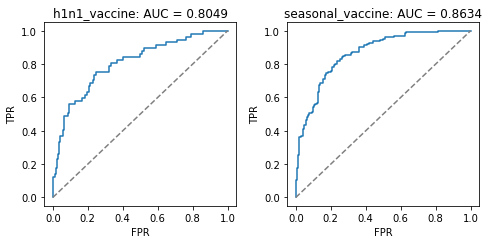

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [0]:
roc_auc_score(y_eval, y_preds)

0.8341897234718386